## Kacper Kinastowski, 250168, 06/03/2023
**Assignment based on lecture by J. Szwabiński & laboratory exercises with T. Weron.**
# Complex Networks, List 1

### Exercise 1

Network density $\rho$ is defined as

$$
\rho = \frac{AC}{PC},
$$

where $AC$ - number of actual connections, $PC$ - number of Potential Connections, which can by calculated simply via

$$
PC = \frac{n(n-1)}{2} = 45, 
$$

$$
\rho = 0.333,
$$

where $n$ - size of the network.

Our test adjecency list:

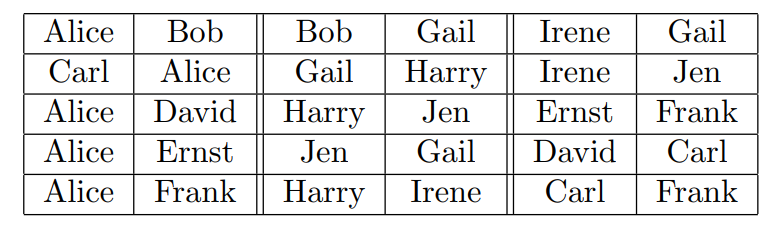



## Graph representation

For simplicty I'm using only first letters of the given name. 

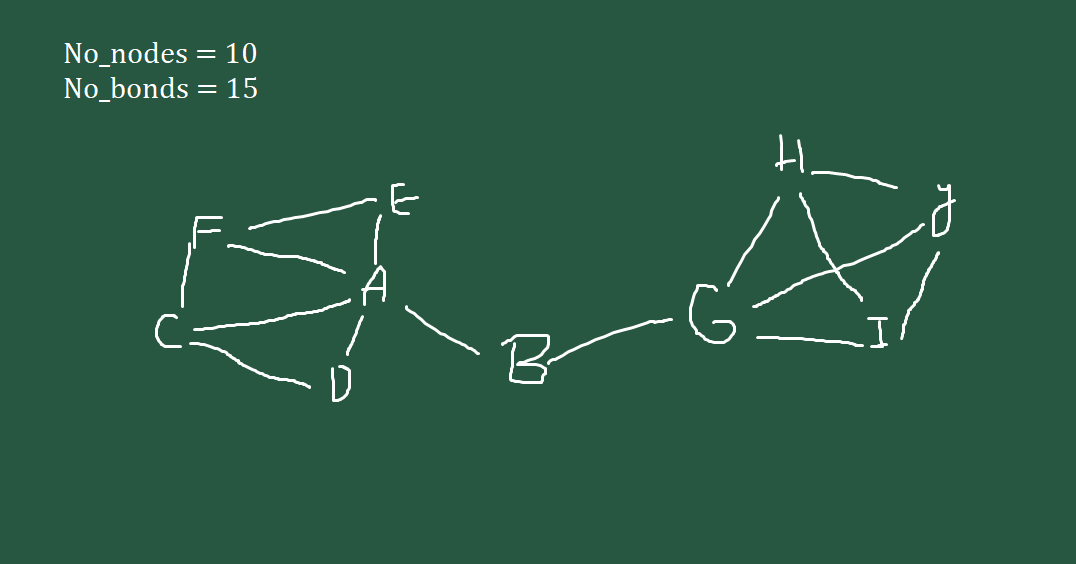

## Important statistics, potential connections & density:

In [1]:
import pandas as pd

network1 = pd.read_csv('list.csv', sep = ';')

no_nodes = max(network1.nunique())
no_bonds = len(network1['x'])

print(f'Number of nodes: {no_nodes}')
print(f'Number of bonds: {no_bonds}')

KeyError: 'x'

In [ ]:
def pc(number_nodes):
    return int(number_nodes * ( number_nodes - 1 ) * .5)

def density(ac, pc):
    return ac/pc

print(f'Potential Connections number: {pc(no_nodes)}')
print(f'density =  {density(no_bonds, pc(no_nodes))}')

This network has the following adjecency matrix representation:

$$
A = 
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 \\
1 & 0 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 \\
1 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 \\
1 & 0 & 1 & 0 & 1 & 0 & 0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 1 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 1 \\
0 & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 0 
\end{bmatrix},
$$

where indices of each row and column represent $\{A, B, \dots, J\}$.

### Degree of a Node

Degree of a given node $X_i$ indexed by $i$ can by calculated as sum of a respective row or column:

$$
\deg(X_i) = \sum_j A_{ij},
$$

In our case:

$$
\deg(A) = 5, \ \deg(F) = 3,\\
\deg(B) = 2, \ \deg(G) = 4,\\
\deg(C) = 3, \ \deg(H) = 3,\\
\deg(D) = 2, \ \deg(I) = 3,\\
\deg(E) = 2, \ \deg(J) = 3,\\
$$

this implies, that the most central node according to **degree** measure is *Alice*.

### Clustering coefficient

Clustering coefficient of a node $X$ is can by calculated via equation

$$
CC(v) = \frac{2N_v}{\deg(v) (\deg(v) -1)},
$$

where $N_v$ is a number of links between neighbors of a node $v$. Clustering coefficient is a fraction, between possible interconnections between neighbors of $v$. In our case:

$$
CC(A) = \frac{3}{10}, \ CC(F) = \frac{2}{3},\\
CC(B) = 0, \ CC(G) = \frac{1}{2},\\
CC(C) = \frac{2}{3}, \ CC(H) = 1,\\
CC(D) = 1, \ CC(I) = 1,\\
CC(E) = 1, \ CC(J) = 1,\\
$$



Average clustering coefficient:

$$
\frac{1}{10} \sum_{\text{all nodes}} CC = 0.713
$$

## Closeness centrality

This measure of centrality (also denoted as $CC$, just like clustering coeff.) measures how short the shortest paths are from given node to other nodes. It can be expressed as:

$$
CC(i) = \frac{n-1}{\sum_j d(i,j)},
$$

where $CC(i)$ is a closeness centrality of a $i$-th node, $n$ is a number of nodes and $d(i,j)$ is a distance between nodes $i$ and $j$. Quantity $\sum_j d(i,j)$ is often called 'farness'. It's easy to introduce so called *distance matrix* $d$ - a similar object to adj. matrix, that measures distance between respective nodes.

$$
d = 
\begin{bmatrix}
0 & 1 & 1 & 1 & 1 & 1 & 2 & 3 & 3 & 3 \\
1 & 0 & 2 & 2 & 2 & 2 & 1 & 2 & 2 & 2 \\
1 & 2 & 0 & 1 & 2 & 1 & 3 & 4 & 4 & 4 \\
1 & 2 & 1 & 0 & 2 & 2 & 3 & 4 & 4 & 4 \\
1 & 2 & 2 & 2 & 0 & 1 & 3 & 4 & 4 & 4 \\
1 & 2 & 1 & 2 & 1 & 0 & 3 & 4 & 4 & 4 \\
2 & 1 & 3 & 3 & 3 & 3 & 0 & 1 & 1 & 1 \\
3 & 2 & 4 & 4 & 4 & 4 & 1 & 0 & 1 & 1 \\
3 & 2 & 4 & 4 & 4 & 4 & 1 & 1 & 0 & 1 \\
3 & 2 & 4 & 4 & 4 & 4 & 1 & 1 & 1 & 0 
\end{bmatrix}.
$$

A vector $\vec u$ containing respective farnesses:

$$
\vec u = 
\begin{bmatrix}
16 \\
16 \\
22\\
23\\
23\\
22\\
18\\
24\\
24\\
24\\
\end{bmatrix}
$$

A vector $\vec c$ which values are respective closeness centrality coefficients of $A, B, ... J$:

$$
\vec c = 
\begin{bmatrix}
0.563 \\
0.563\\
0.409\\
0.391\\
0.391\\
0.409\\
0.500\\
0.375\\
0.375\\
0.375\\
\end{bmatrix}
$$

According to CC the most central nodes are $A$ & $B$.

## Betweness centrality

Betweness centrality measures how important is this node in the overall information flow in graph. To be more precise it measures how many shortest distance between different nodes goes through the given graph. 

In more formal way Betweness centrality $\text{BC}(v)$ of a given node $v$ is a sum of fractions of number of all possible shortest paths that go through $v$ and all possible shortest paths in graph. Sometimes it is normalized by dividing by sum of all possible shortest paths.

$$
\text{BC}(v) =  \frac{  \sum_{i,j\neq v}  \left( \frac{ \sigma_{v}(i,j)}{\sigma(i,j)} \right) }{\sum_{i,j\neq v} \sigma(i,j)}
$$

where sum is over all possible nodes $i \neq j$, $\sigma(i,j)$ is a number of all possible shortest paths between $(i,j)$ and $\sigma_{v}(i,j)$ is a number of all possible shortest paths between $(i,j)$ that go through $v$.

According to this measure Alice is the most central node because it is clearly visible that a lot of shortest distance paths between different nodes run through $A$.

$\text{BC}(A)$ can be calculaten in the following way

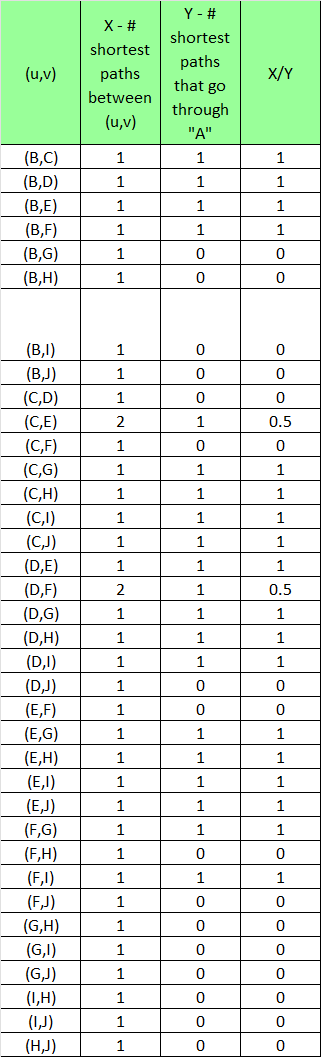

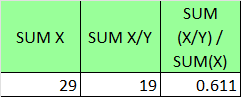

It's a lot of writing! So i did the rest in Python:

In [2]:
import networkx as nx

links = [('A','B'), ('C','A'), ('A','D'), ('A','E'), ('A','F'),
        ('B','G'), ('G','H'), ('H','J'), ('J','G'), ('H','I'),
        ('I','G'), ('I','J'), ('E','F'), ('D','C'), ('C','F')]

G = nx.Graph()

G.add_edges_from(links)

bc = nx.betweenness_centrality(G)

for node, btwn in bc.items():
    print(node, btwn)

A 0.611111111111111
B 0.5555555555555556
C 0.013888888888888888
D 0.0
E 0.0
F 0.013888888888888888
G 0.5
H 0.0
J 0.0
I 0.0


## Exercise 2 
## Gephi Visualization

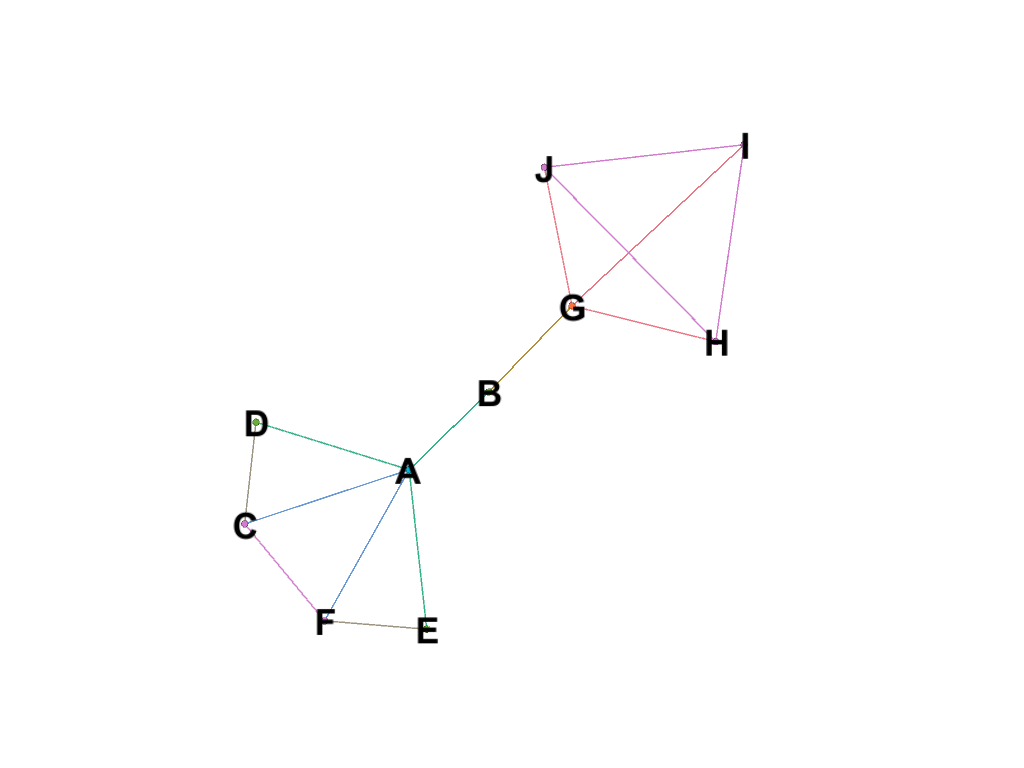

## Gephi Stats (CC distribution)
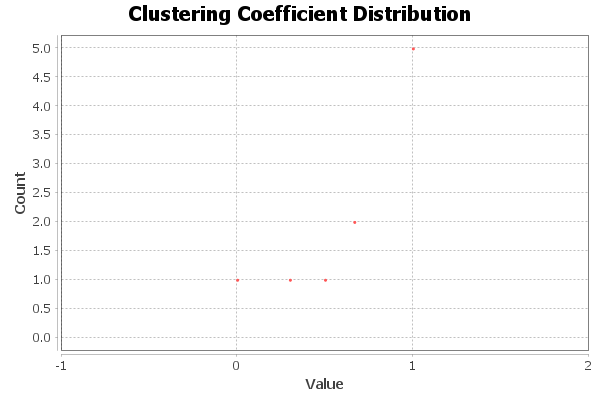


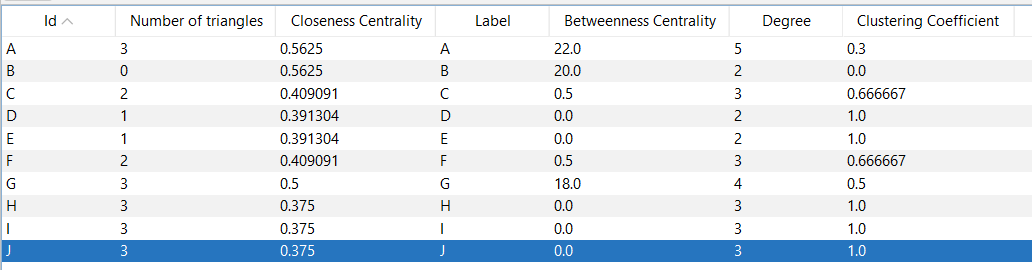

## Even More Gephi stats (Degree ditribution)

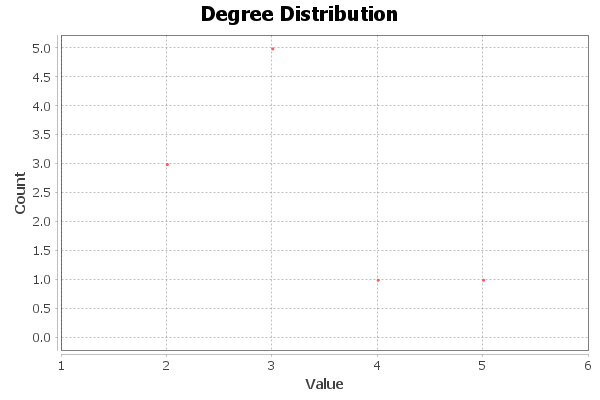

## Exercise 3.

Let $\mathbf{A} \in \mathbb{R} ^{N \times N}$ be a adjencency matrix representing a network of size $N$ and $\vec e$ be a column vecotr of size $N$ with all values set to $1$, i.e. :

$$
\vec e = [1, 1, \dots, 1]^{T}.
$$

Then we can define the following quantities:

1. A vector $\vec k$ whose elements $k_i$ are equal to a degree of $i$-th node:

$$
\vec k = \mathbf{A} \vec e
$$

2. A total number of $L$ links in the network ( $(\vec e) ^ T$ is a transpose of a vector $\vec e$) :

$$
2L = (\vec e) ^ T \cdot \vec k = (\vec e) ^ T \mathbf{A} \vec e, \\
L = \frac{1}{2} (\vec e) ^ T \mathbf{A} \vec e, \\
$$


3. The matrix $N$ whose elements are equal to the number of commonneighbors of respective nodes:

$$
L = \mathbf{A} ^ 2,
$$

4. The number $T$ of triangles present in the network. This value is connected with third power of adjecency matrix $A^3$. To be specific sum of all triangles is equal to sum of it's diagonal values divided by 6  - this comes from the fact that we first divide by 3 (3 vertices of a triangle) and by 2 (bc. the graph is undirected). We can rewrite this fact as 

$$
T = \frac{1}{6} \text{tr} (\mathbf{A} ^3).
$$

5. Is this graph connected? Quickly speaking: a graph is **not** connected if $N$ can be represented as a block-diagonal matrix. Let $\mathbf{A}$ be a adj. matrix representing not connected graph

$$
\mathbf{A} = \begin{bmatrix} 
  \mathbf{A}_1 & \mathbf{0}    & \cdots & \mathbf{0}   \\
  \mathbf{0}   & \mathbf{A}_2  & \cdots & \mathbf{0}   \\
  \vdots       & \vdots        & \ddots & \vdots       \\
  \mathbf{0}   & \mathbf{0}    & \cdots & \mathbf{A}_n
\end{bmatrix},
$$

wher $\mathbf{A}_1, \mathbf{A}_2, \dots,  \mathbf{A}_n$ are sub-matrices representing separate sub-graphs. 

If otherwise it is connected. If a adjecency matrix can be sorted into block-diagonal form, then each block represents separate 'sub' graphs. 


## Exercise 3.1 

We can check the above relations by examining the following, simple, undirectional graph

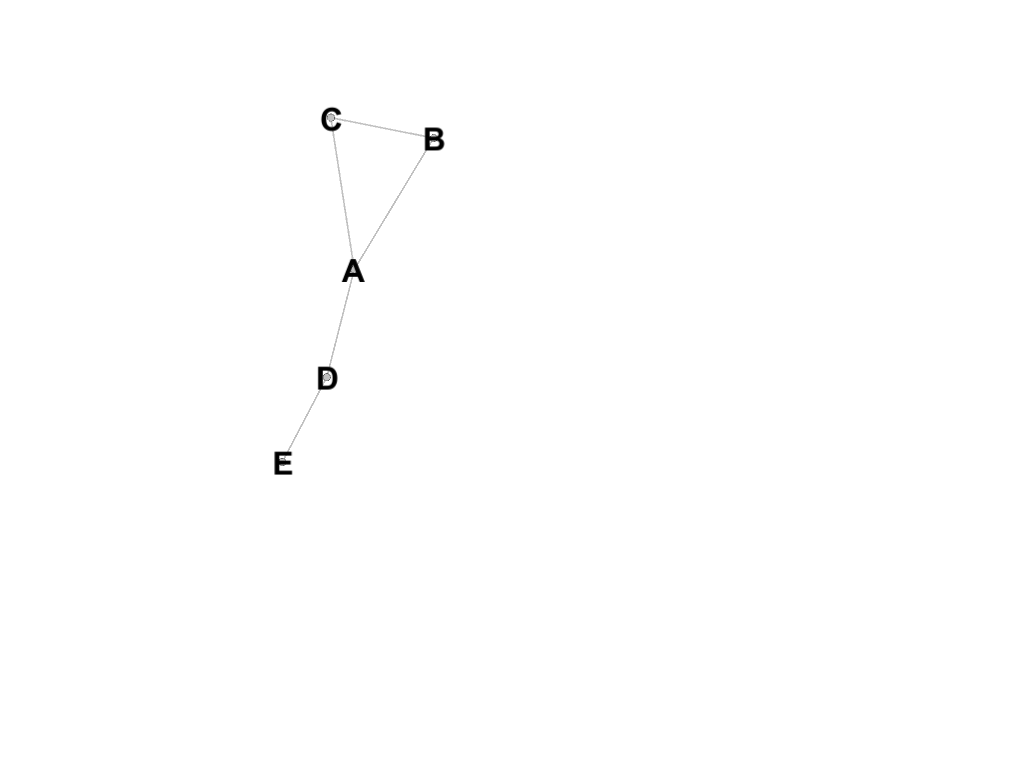, 

that can be described by adj. matrix:

$$
A =
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\   
1 & 1 & 0 & 0 & 0 \\   
1 & 0 & 0 & 0 & 1 \\   
0 & 0 & 0 & 1 & 0 \\   
\end{bmatrix}
$$

$$
\vec e =
\begin{bmatrix}
1  \\
1  \\   
1  \\   
1  \\   
1  \\   
\end{bmatrix}
$$



1. A vector 𝑘⃗  whose elements 𝑘𝑖 are equal to a degree of 𝑖-th node:

$$
\vec k = A \vec e = 
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\   
1 & 1 & 0 & 0 & 0 \\   
1 & 0 & 0 & 0 & 1 \\   
0 & 0 & 0 & 1 & 0 \\   
\end{bmatrix}
\begin{bmatrix}
1  \\
1  \\   
1  \\   
1  \\   
1  \\   
\end{bmatrix}
=
\begin{bmatrix}
3  \\
2  \\   
2  \\   
2  \\   
1  \\   
\end{bmatrix}.
$$


2. A total number of $L$ links in the network:

$$
L = \frac{1}{2} (\vec e) ^ T \cdot \vec k = 
\frac{1}{2}
\begin{bmatrix}
1 & 1 & 1 &  1 & 1 \\
\end{bmatrix}
\cdot 
\begin{bmatrix}
3  \\
2  \\   
2  \\   
2  \\   
1  \\   
\end{bmatrix}
= 5
.
$$

3. the matrix $N$ whose elements are equal to the number of commonneighbors of respective nodes:

$$
L = A ^ 2
=
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\   
1 & 1 & 0 & 0 & 0 \\   
1 & 0 & 0 & 0 & 1 \\   
0 & 0 & 0 & 1 & 0 \\   
\end{bmatrix}^2
=
\begin{bmatrix}
3 & 1 & 1 & 0 & 1 \\
1 & 2 & 1 & 1 & 0 \\   
1 & 1 & 2 & 1 & 0 \\   
0 & 1 & 1 & 2 & 0 \\   
1 & 0 & 0 & 0 & 1 \\   
\end{bmatrix}
.
$$

4. The number $T$ of triangles present in the network:

$$
T = \text{tr} (A ^3) 
= 
\frac{1}{6}
\text{tr}
\begin{bmatrix}
0 & 1 & 1 & 1 & 0 \\
1 & 0 & 1 & 0 & 0 \\   
1 & 1 & 0 & 0 & 0 \\   
1 & 0 & 0 & 0 & 1 \\   
0 & 0 & 0 & 1 & 0 \\   
\end{bmatrix}^3
 = 1.
$$

5. It is not possible to sort A into block-diagonal form. It's clearly connected :)

In [ ]:
import networkx as nx
from matplotlib import pyplot as plt

In [ ]:
G = nx.barabasi_albert_graph(100,4)


In [ ]:
H = nx.erdos_renyi_graph(100, 0.2)

In [ ]:
%%timeit

degrees = dict(G.degree())
kaver = sum(degrees.values()) / len(G)

kaver

In [ ]:
%%timeit

2*len(G.edges())/len(G)

In [ ]:
nx.draw(H)

In [ ]:
G.degree()

In [ ]:
dict(G.degree())

In [ ]:
G1 = nx.Graph()
G1.add_edges_from([(3,4), (4,2), (3,2), (2,1), (1,4), (1,5), (1,3)])

nx.draw(G1, with_labels = True)